<a href="https://colab.research.google.com/github/aarya-23/Image-CLassification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE CLASSIFICATION** - Smartphones vs Headphones vs Keyboards

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target =[]
images =[]
flat_data =[]

DATADIR = '/content/drive/MyDrive/ML'
CATEGORIES =['smartphones','headphones','keyboards']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.25,random_state=5)


In [18]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1])

In [20]:
y_test

array([1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 1, 2, 2, 2, 1])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.5666666666666667

In [22]:
confusion_matrix(y_pred,y_test)

array([[3, 3, 2],
       [4, 8, 0],
       [2, 2, 6]])

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,2,10,100,1000],'kernel':['linear']},
            {'C':[1,2,10,100,1000],'gamma':[01.,0.2,0.3,0.4,0.001,0.0001],'kernel':['rbf']}]
              

grid_search = GridSearchCV(estimator = clf,param_grid=parameters,
                           scoring='accuracy',cv=10,n_jobs=-1)

grid_search = grid_search.fit(x_train,y_train)



In [30]:
accuracy = grid_search.best_score_
accuracy

0.7666666666666668

In [31]:
grid_search.best_params_

{'C': 2, 'gamma': 0.0001, 'kernel': 'rbf'}

In [32]:
clf = SVC(C=2,gamma=0.0001,kernel='rbf')
clf.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1])

In [41]:
y_test

array([1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 1, 2, 2, 2, 1])

In [42]:
accuracy_score(y_pred,y_test)

0.5666666666666667

In [43]:
confusion_matrix(y_pred,y_test)

array([[3, 3, 2],
       [4, 8, 0],
       [2, 2, 6]])

In [29]:
import pickle 
pickle.dump(clf,open('img_model.p','wb'))

In [25]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://d2j6dbq0eux0bg.cloudfront.net/images/1107006/977701181.jpg
(1000, 1000, 3)
PREDICTED OUTPUT: keyboards


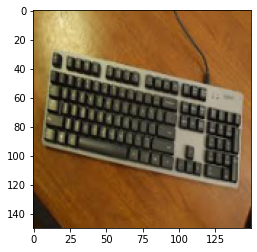

In [26]:
flat_data =[]
url = input('Enter your URL')
img = imread(url)
img_resied = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')